In [1]:
#connect to google drive-model and dataset are saved in google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#mention dataset for BERT Model-1
dataset_path='/content/gdrive/MyDrive/MANTHAN-2/hate-classification-dataset.csv'

#mention path of BERT Model-1-b(bert-1 refers to the model for hate content classification and d is the model which was obtained by training the c version)
model_path='/content/gdrive/MyDrive/MANTHAN-2/bert-1-model-1-d'

In [3]:
import pandas as pd

df=pd.read_csv(dataset_path)
df

,Unnamed: 0,text,label
0,0,` == You have no life or friends and all the...,0
1,1,==YOU JERK== PUNK ASS BITCH!!!!!!!!!!!!!!!!!...,0
2,2,== User messages. == I guess you missed the...,0
3,3,== I despise the way you have treated my fel...,0
4,4,I dont care about your note fuck you. I will...,0
...,...,...,...
15755,15755,fine u can keep pulling this shit and uve go...,7
15756,15756,== Europeans are the racist trolls. == Swed...,7
15757,15757,==Answer to Mütze== You dare contacting your...,7
15758,15758,You stupid and more liar than me you don't w...,7


In [4]:
df.shape
#we have 15760 training samples in all for all the 8 categories

(15760, 3)

In [5]:
df['label'].value_counts()

#8 classes of hate with 1970 training samples in each-this was obtained after undersampling.
#Undersampling was necessary here as most user comments/posts are not hate content.

7    1970
6    1970
5    1970
4    1970
3    1970
2    1970
1    1970
0    1970
Name: label, dtype: int64

In [6]:
X=list(df['text'])

In [7]:
y=list(df['label'])

In [8]:
#there are 8 categories:
# -agression-0
# -attack-1
# -non-sarcasm-2
# -normal-3
# -racism-4
# -sarcasm-5
# -sexism-6
# -toxicity-7

set(y)

{0, 1, 2, 3, 4, 5, 6, 7}

In [9]:
from sklearn.model_selection import train_test_split

#20% for testing and 80% for training-the ideal train-test split
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [10]:
len(X_train),len(y_train)

#so,we have 12608 training samples

(12608, 12608)

In [11]:
len(x_test),len(y_test)

#we have 3152 testing samples

(3152, 3152)

In [12]:
#Install the transformers library needed for BERT.BERT too is indeed a transformer-based model=>we need this library

!pip install transformers

     |████████████████████████████████| 3.1 MB 5.3 MB/s 
     |████████████████████████████████| 596 kB 44.2 MB/s 
     |████████████████████████████████| 61 kB 542 kB/s 
     |████████████████████████████████| 3.3 MB 38.6 MB/s 
     |████████████████████████████████| 895 kB 42.8 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [13]:
#Import the pre-trained BERT model:DistilBERT and the necessaary tokenizer to perform text pre-processing

from transformers import DistilBertTokenizerFast
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [14]:
#BERT takes word embeddings as input.So,generate them for all the samples in the train and test datasets using the BERT tokenizer itself

train_encodings = tokenizer(X_train, truncation=True, padding=True)
test_encodings = tokenizer(x_test, truncation=True, padding=True)

In [15]:
import tensorflow as tf

train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    y_train
))


In [16]:
#TFDistilBertForSequenceClassification is the category of the pre-trained DistilBert model which we are using

from transformers import TFDistilBertForSequenceClassification, TFTrainer, TFTrainingArguments



In [17]:
#train bert model on GPU

loaded_model = TFDistilBertForSequenceClassification.from_pretrained(model_path)

optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)


loaded_model.compile(optimizer=optimizer, loss=loaded_model.compute_loss, metrics=['accuracy'])

history=loaded_model.fit(train_dataset.shuffle(100).batch(16),
          epochs=5,
          batch_size=32)

#here,load the saved model i.e., the previous version bert-1-model-1-d and train this for 5 more epochs
#this is done due to the RAM considerations of Google Colab and keeping the GPU usage in mind


All model checkpoint layers were used when initializing TFDistilBertForSequenceClassification.

All the layers of TFDistilBertForSequenceClassification were initialized from the model checkpoint at /content/gdrive/MyDrive/MANTHAN-2/bert-1-model-1-d.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


Epoch 1/5
788/788 [==============================] - 1322s 2s/step - loss: 0.2017 - accuracy: 0.9237
Epoch 2/5
788/788 [==============================] - 1310s 2s/step - loss: 0.1479 - accuracy: 0.9373
Epoch 3/5
788/788 [==============================] - 1311s 2s/step - loss: 0.1150 - accuracy: 0.9479
Epoch 4/5
788/788 [==============================] - 1314s 2s/step - loss: 0.1182 - accuracy: 0.9433
Epoch 5/5
788/788 [==============================] - 1303s 2s/step - loss: 0.1081 - accuracy: 0.9478


In [18]:
# trainer.save_model('senti_model')

model_save_path="/content/gdrive/MyDrive/MANTHAN-2/bert-1-model-1-e"
loaded_model.save_pretrained(model_save_path)

#save the current model as version-e


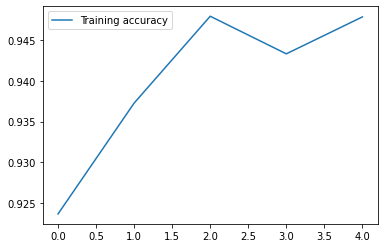

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label="Training accuracy")
plt.legend()

plt.savefig('bert1-acc.png')
plt.show()

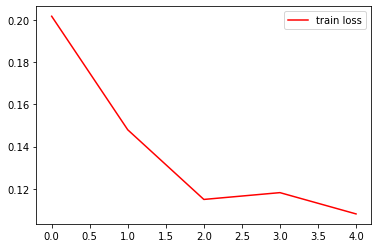

In [20]:
# loss
plt.plot(history.history['loss'], label='train loss',color='red')

plt.legend()

plt.savefig('bert1-acc.png')
plt.show()

In [21]:
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np

#predict using the loaded model
loaded_model = TFDistilBertForSequenceClassification.from_pretrained(model_save_path)
y_pred=[]

for test_sentence in x_test:
  predict_input = tokenizer.encode(test_sentence,
                                 truncation=True,
                                 padding=True,
                                 return_tensors="tf")

  tf_output = loaded_model.predict(predict_input)[0]
  tf_prediction = tf.nn.softmax(tf_output, axis=1).numpy()
  ans=np.argmax(tf_prediction,axis=1)
  y_pred.append(ans)


Some layers from the model checkpoint at /content/gdrive/MyDrive/MANTHAN-2/bert-1-model-1-e were not used when initializing TFDistilBertForSequenceClassification: ['dropout_19']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at /content/gdrive/MyDrive/MANTHAN-2/bert-1-model-1-e and are newly initialized: ['dropout_39']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [22]:
cats=["aggression","attack","non-sarcasm","normal","racism","sarcasm","sexism","toxicity"]
print(classification_report(y_pred,y_test,target_names=cats))

              precision    recall  f1-score   support

  aggression       0.72      0.74      0.73       377
      attack       0.79      0.74      0.76       434
 non-sarcasm       0.99      0.99      0.99       409
      normal       0.97      0.97      0.97       361
      racism       1.00      0.98      0.99       419
     sarcasm       0.98      0.99      0.99       403
      sexism       0.98      1.00      0.99       399
    toxicity       0.72      0.75      0.73       350

    accuracy                           0.90      3152
   macro avg       0.89      0.90      0.89      3152
weighted avg       0.90      0.90      0.90      3152



In [23]:
confusion_matrix(y_pred,y_test)

array([[279,  44,   0,   4,   0,   0,   0,  50],
       [ 62, 322,   0,   1,   0,   0,   0,  49],
       [  0,   0, 403,   0,   0,   6,   0,   0],
       [  2,   2,   0, 351,   0,   1,   2,   3],
       [  0,   0,   0,   2, 411,   0,   6,   0],
       [  0,   0,   2,   0,   0, 400,   0,   1],
       [  0,   0,   0,   0,   0,   0, 399,   0],
       [ 43,  40,   1,   4,   0,   0,   0, 262]])